In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

# Data Loading
---

In [2]:
df = pd.read_csv('fetal_health.csv')

In [3]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
df.tail()

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
2121          137.0          177.0                        4.0   
2122          103.0          169.0                        6.0   
2123          103.0          170.0                        5.0   
2124          103.0          169.0                        6.0   
2125          117.0          159.0                        2.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
2121                         0.0           153.0           150.0   
2122                         0.0           152.0           148.0   
2123                         0.0           153.0           148.0   
2124                         0.0           152.0           147.0   
2125                         1.0           145.0           143.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
2121             152.0                 2.0                 0.0           2.0  
2122             151.0                 3.0                 1.0           2.0  
2123             152.0                 4.0                 1.0           2.0  
2124             151.0                 4.0                 1.0           2.0  
2125             145.0                 1.0                 0.0           1.0  

[5 rows x 22 columns]

In [5]:
df.shape

(2126, 22)

# EDA
---

In [7]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [9]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

# 1. Handling Categorical Values

In [10]:
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

# 2. Handling Null Values

In [11]:
df.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [12]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

# 3. Correlation

In [13]:
df.corr()

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.148151   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                            -0.364066   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

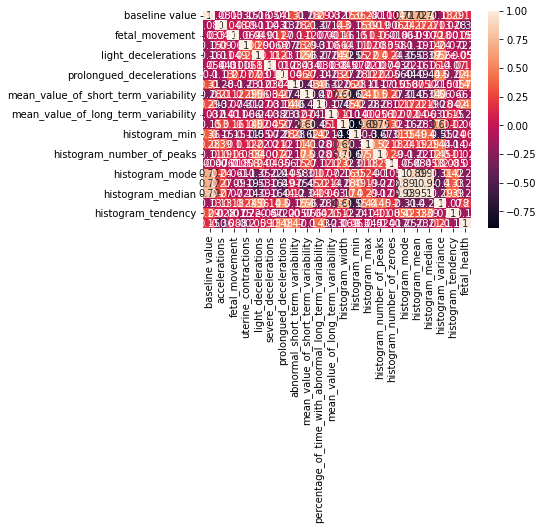

In [14]:
sns.heatmap(df.corr(), annot = True)

# 4. Class Distributions

In [15]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [31]:
len(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'])

22

In [16]:
# Count the number of instances in each class
class_counts = df['fetal_health'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


In [18]:
#data_cleaning_suggestions(df)

In [30]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [34]:
len(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'])

22

In [19]:
X = df.drop('fetal_health', axis = 1)
y = df['fetal_health']

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: 1.0    1322
2.0     231
3.0     147
Name: fetal_health, dtype: int64
Class distribution after resampling: 1.0    1322
2.0    1322
3.0    1322
Name: fetal_health, dtype: int64


In [24]:
acc=[]
model=[]

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train_res, y_train_res)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  81.45539906103286
              precision    recall  f1-score   support

         1.0       0.99      0.77      0.87       333
         2.0       0.47      0.95      0.63        64
         3.0       0.80      0.97      0.88        29

    accuracy                           0.81       426
   macro avg       0.75      0.90      0.79       426
weighted avg       0.90      0.81      0.83       426



In [27]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train_res, y_train_res)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

[17:46:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9624413145539906
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       333
         2.0       0.88      0.88      0.88        64
         3.0       1.00      1.00      1.00        29

    accuracy                           0.96       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426



In [33]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(XB, 'xg_boost_recomondation_fh.pkl')
 
# Load the model from the file
knn_from_joblib = joblib.load('xg_boost_recomondation_fh.pkl')
 
# Use the loaded model to make predictions